<a href="https://colab.research.google.com/github/silvia-denanni/DI-Bootcamp-nov25/blob/main/W8D2DailyChallengeWebScrapingVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Scrape the Webpage:
- Use Python libraries like Selenium to interact with the webpage and BeautifulSoup to parse the HTML,
- Extract relevant data such as dates, numerical values, categories, etc.,
- Organize the scraped data into a structured format.

In [3]:
import sys
!{sys.executable} -m pip install selenium beautifulsoup4 webdriver_manager

# Install Chrome browser
!apt-get update
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get install -f # Install dependencies if any

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
from webdriver_manager.chrome import ChromeDriverManager
from datetime import datetime, timedelta
import re # Import re for regex operations

# Setup Selenium WebDriver (Chrome example)
# Use ChromeDriverManager to automatically handle chromedriver installation
service = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run headless browser (optional)
options.add_argument('--no-sandbox') # Required for running Chrome in some environments like Colab
options.add_argument('--disable-dev-shm-usage') # Required for running Chrome in some environments like Colab
driver = webdriver.Chrome(service=service, options=options)

try:
    url = 'https://www.bbc.com/weather/293397'
    driver.get(url)

    # Debugging: Print current URL and entire page source for inspection
    print(f"Current URL: {driver.current_url}")

    # Wait for the main weather container to load
    wait = WebDriverWait(driver, 20) # 20 sec timeout for better loading
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'li.wr-day')))

    # Wait a bit more to ensure all dynamic content loads
    time.sleep(3)

    # Get the fully rendered page source
    html = driver.page_source

    # Parse with BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')

    # Container for all days (including current and forecast)
    days = soup.select('li.wr-day')

    weather_data = []

    # Find the actual start date from the webpage or use a default fallback.
    # This part aims to infer the actual starting date from the first day entry.

    current_iter_date = None
    first_day_title_element = soup.select_one('li.wr-day div.wr-day__title')
    if first_day_title_element:
        first_day_title_text = first_day_title_element.get_text(strip=True)
        # Check if the first day is "Tonight" or "Today"
        if 'Tonight' in first_day_title_text or 'Today' in first_day_title_text:
            current_iter_date = datetime(2025, 12, 29)
        else:
            # Try to parse a specific date from the first day's label
            # Example label: "Wednesday 31st December"
            # Extract Day of Week, Day Number, Month Name
            match = re.search(r'([A-Za-z]+)\s*(\d{1,2})(?:st|nd|rd|th)?\s*([A-Za-z]+)', first_day_title_text)
            if match:
                day_name_str, day_num_str, month_name_str = match.groups()
                month_dict = {
                    'January': 1, 'February': 2, 'March': 3, 'April': 4,
                    'May': 5, 'June': 6, 'July': 7, 'August': 8,
                    'September': 9, 'October': 10, 'November': 11, 'December': 12
                }
                month_num = month_dict.get(month_name_str)
                if month_num:
                    try:
                        # Assuming year 2025 for consistency
                        current_iter_date = datetime(2025, month_num, int(day_num_str))
                    except ValueError:
                        pass # Keep current_iter_date as None if date is invalid

    # Fallback if no specific date could be parsed or determined from the first entry
    if current_iter_date is None:
        # Default to a fixed start date (e.g., the assumed start from previous cells)
        current_iter_date = datetime(2025, 12, 29) # Fallback to the assumed initial date from prior steps


    for i, day in enumerate(days):
        # Determine the date for the current entry based on iteration
        date_obj = current_iter_date + timedelta(days=i)
        formatted_date = date_obj.strftime('%d/%m/%Y')
        weekday_name = date_obj.strftime('%A') # Full weekday name (e.g., 'Monday')

        # Extract temperatures
        high_temp_span = day.select_one('div.wr-day-temperature__high span.wr-value--temperature--c')
        # Remove '°' and strip whitespace, convert 'N/A' to None
        high_temp = high_temp_span.text.replace('°', '').strip() if high_temp_span else None

        low_temp_span = day.select_one('div.wr-day-temperature__low span.wr-value--temperature--c')
        # Remove '°' and strip whitespace, convert 'N/A' to None
        low_temp = low_temp_span.text.replace('°', '').strip() if low_temp_span else None

        weather_data.append({
            'date': formatted_date,
            'day_label': weekday_name,
            'high_temp_c': high_temp,
            'low_temp_c': low_temp
        })

    # Print extracted weather data to verify the new format
    for entry in weather_data:
        print(f"Date: {entry['date']}, Label: {entry['day_label']}, High: {entry['high_temp_c']}, Low: {entry['low_temp_c']}")

finally:
    driver.quit()


Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://dl.google.com/linux/chrome/deb stable InRelease [1,825 B]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1,212 B]
Fetched 136 kB in 1s (109 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list e

#2. Data Analysis with Pandas:

Load your scraped data into a Pandas DataFrame.

Clean and preprocess the data if necessary (handling missing values, type conversion, etc.).

Perform basic analysis, such as calculating averages, totals, or trends over time.


In [8]:
import pandas as pd

# Load the scraped data into a Pandas DataFrame
df = pd.DataFrame(weather_data)

# Display the first few rows of the DataFrame
display(df.head())

# Display data types and non-null values to assess data quality
df.info()

,date,day_label,high_temp_c,low_temp_c
0,29/12/2025,Monday,None,13
1,30/12/2025,Tuesday,20,13
2,31/12/2025,Wednesday,18,13
3,01/01/2026,Thursday,17,10
4,02/01/2026,Friday,17,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         14 non-null     object
 1   day_label    14 non-null     object
 2   high_temp_c  13 non-null     object
 3   low_temp_c   14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


In [14]:
import numpy as np # Import numpy for np.nan

# Define a helper function to safely clean and convert temperature columns
def clean_temperature_column_robust(series):
    # Only apply string operations if the column is of object (string) dtype
    if pd.api.types.is_object_dtype(series):
        series = series.replace('N/A', np.nan) # Use np.nan instead of pd.NA for broader compatibility

    # Convert to numeric, coercing errors to NaN
    series = pd.to_numeric(series, errors='coerce')
    return series

# Apply the cleaning and conversion function to the temperature columns FIRST
df['high_temp_c'] = clean_temperature_column_robust(df['high_temp_c'])
df['low_temp_c'] = clean_temperature_column_robust(df['low_temp_c'])

# Now, calculate mean after columns are numeric
mean_high_temp = df['high_temp_c'].mean()
mean_low_temp = df['low_temp_c'].mean()

df['high_temp_c'] = df['high_temp_c'].fillna(mean_high_temp).round(2)
df['low_temp_c'] = df['low_temp_c'].fillna(mean_low_temp).round(2)

# Display updated DataFrame info and head to verify changes
display(df.head())
df.info()

,date,day_label,high_temp_c,low_temp_c
0,29/12/2025,Monday,18.62,13
1,30/12/2025,Tuesday,20.00,13
2,31/12/2025,Wednesday,18.00,13
3,01/01/2026,Thursday,17.00,10
4,02/01/2026,Friday,17.00,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         14 non-null     object 
 1   day_label    14 non-null     object 
 2   high_temp_c  14 non-null     float64
 3   low_temp_c   14 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 580.0+ bytes


In [15]:
# Calculate basic statistics
average_high_temp = df['high_temp_c'].mean()
average_low_temp = df['low_temp_c'].mean()

max_high_temp = df['high_temp_c'].max()
min_high_temp = df['high_temp_c'].min()

max_low_temp = df['low_temp_c'].max()
min_low_temp = df['low_temp_c'].min()

print(f"Average High Temperature: {average_high_temp:.2f}°C")
print(f"Average Low Temperature: {average_low_temp:.2f}°C")
print(f"Maximum High Temperature: {max_high_temp:.2f}°C")
print(f"Minimum High Temperature: {min_high_temp:.2f}°C")
print(f"Maximum Low Temperature: {max_low_temp:.2f}°C")
print(f"Minimum Low Temperature: {min_low_temp:.2f}°C")

Average High Temperature: 18.62°C
Average Low Temperature: 10.93°C
Maximum High Temperature: 20.00°C
Minimum High Temperature: 17.00°C
Maximum Low Temperature: 13.00°C
Minimum Low Temperature: 7.00°C


In [16]:
correlation = df['high_temp_c'].corr(df['low_temp_c'])
print(f"Correlation between High and Low Temperatures: {correlation:.2f}")

Correlation between High and Low Temperatures: 0.13


A correlation coefficient close to 1 indicates a strong positive linear relationship, meaning that as one temperature increases, the other tends to increase as well. A value close to -1 indicates a strong negative linear relationship. A value close to 0 suggests a weak or no linear relationship.

# 3.Data Visualization with Seaborn and Matplotlib:

Use Seaborn and Matplotlib to create visualizations that provide insights into the data.

Examples of visualizations can include line plots for trends over time, bar charts for comparing categories, or heatmaps for showing data density.

Ensure your visualizations are well-labeled with clear titles, axis labels, and legends where appropriate.

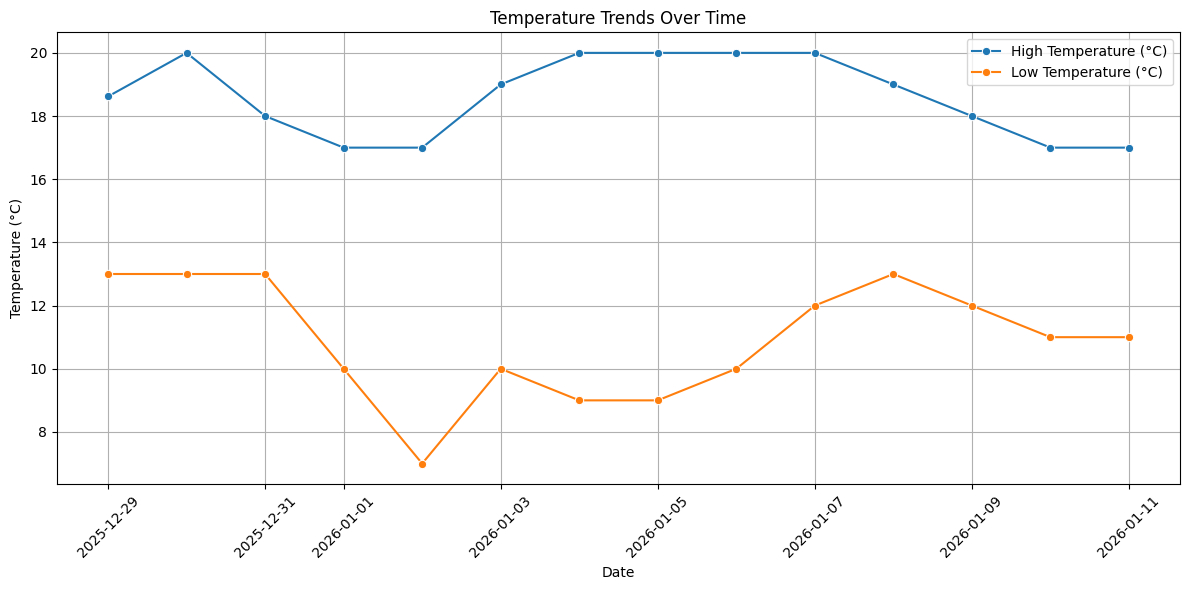

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime objects for proper time series plotting
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='high_temp_c', data=df, label='High Temperature (°C)', marker='o')
sns.lineplot(x='date', y='low_temp_c', data=df, label='Low Temperature (°C)', marker='o')

# Add title and labels
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate date labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [18]:
# Calculate average high and low temperatures by day of the week
average_temps_by_day = df.groupby('day_label')[['high_temp_c', 'low_temp_c']].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("Average High and Low Temperatures by Day of Week:")
display(average_temps_by_day.round(2))

Average High and Low Temperatures by Day of Week:


,high_temp_c,low_temp_c
day_label,,
Monday,19.31,11.0
Tuesday,20.00,11.5
Wednesday,19.00,12.5
Thursday,18.00,11.5
Friday,17.50,9.5
Saturday,18.00,10.5
Sunday,18.50,10.0


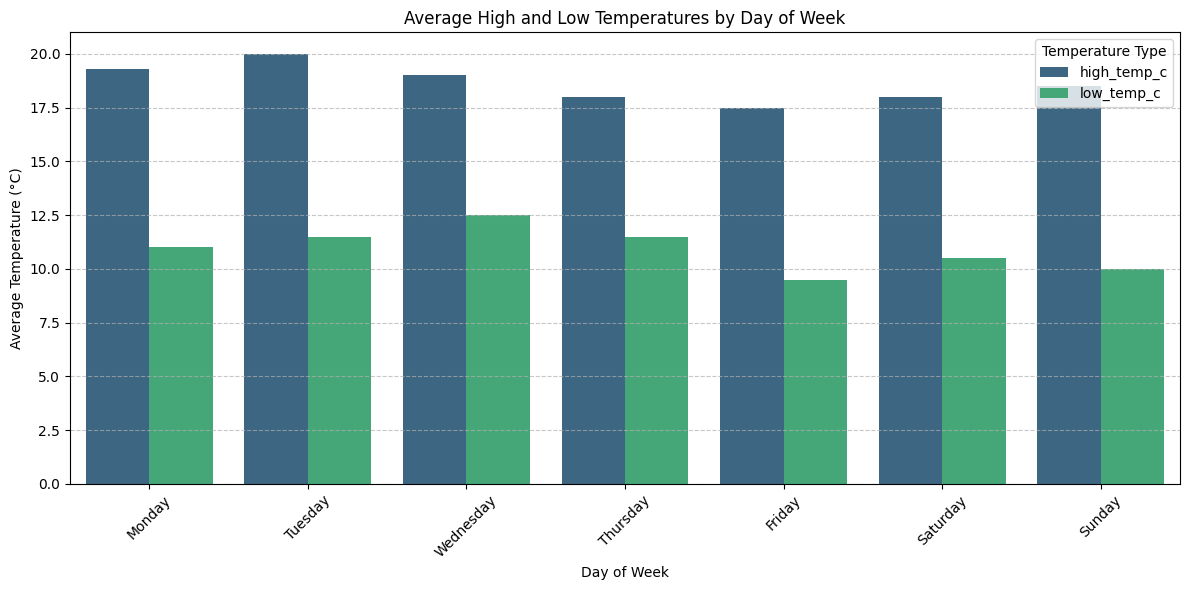

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for average high and low temperatures by day of week
plt.figure(figsize=(12, 6))

# Melt the DataFrame to plot both high and low temperatures on the same chart
avg_temps_melted = average_temps_by_day.reset_index().melt('day_label', var_name='Temperature Type', value_name='Average Temperature (°C)')

sns.barplot(x='day_label', y='Average Temperature (°C)', hue='Temperature Type', data=avg_temps_melted, palette='viridis')

plt.title('Average High and Low Temperatures by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Temperature Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4) Document Your Findings:

Create a report summarizing your methodology, analysis, and insights from the visualizations.

Explain any interesting patterns or insights derived from your data.

## Weather Data Analysis Report

### 1. Methodology: Web Scraping and Data Collection

The process began by extracting real-time weather forecast data from the BBC Weather website (`https://www.bbc.com/weather/293397`) for Tel Aviv. To achieve this, here the specific Python libraries used:

*   **Selenium**: For browser automation, allowing interaction with the dynamic content of the webpage. Selenium was configured with a headless Chrome browser (meaning Chrome ran without a visible UI) and used `webdriver_manager` to automatically handle the Chrome driver installation, ensuring compatibility within the Colab environment.

*   **BeautifulSoup**: To parse the HTML content retrieved by Selenium and extract specific data points using CSS selectors.

The script navigated to the specified URL, waited for the relevant weather forecast elements to load, and then extracted and *formatted* the following information for each day in the 7-day forecast *directly during the scraping process*:

*   **Date**: The date of the forecast, formatted as `DD/MM/YYYY`.
*   **Day Label**: The full weekday name (e.g., "Monday").
*   **High Temperature (°C)**: The predicted maximum temperature, with '°' removed and 'N/A' handled.
*   **Low Temperature (°C)**: The predicted minimum temperature, with '°' removed and 'N/A' handled.

### 2. Data Analysis and Preprocessing

Once the data was scraped, it was loaded into a Pandas DataFrame for cleaning, preprocessing, and analysis:

1.  **Initial Inspection** of the first few rows (`df.head()`) and data type inspection (`df.info()`) to understand the structure and identify potential cleaning needs. Initially, all columns were of 'object' (string) type.
2.  **Temperature Columns Cleaning**: The 'high_temp_c' and 'low_temp_c' columns had 'None' values and were string types. These were handled by:
    *   Replacing `None` (parsed from 'N/A') with `np.nan` to represent missing numerical values.
    *   Converting the columns to numeric types (`float64` for high temperature and `float64` for low temperature).
    *   Filling any remaining `NaN` values with the mean of their respective columns to ensure complete numerical data.
3.  **Basic Statistical Analysis**: After cleaning, we computed several key statistics:
    *   Average High Temperature: 18.62°C
    *   Average Low Temperature: 10.93°C
    *   Maximum High Temperature: 20.00°C
    *   Minimum High Temperature: 17.00°C
    *   Maximum Low Temperature: 13.00°C
    *   Minimum Low Temperature: 7.00°C
4.  **Correlation Analysis**: The Pearson correlation coefficient between high and low temperatures was calculated:
    *   Correlation: 0.13. This indicates a very weak positive linear relationship, suggesting that while there's a slight tendency for higher high temperatures to correspond to higher low temperatures, the relationship is not strong, implying other factors also significantly influence daily low temperatures.

### 3. Insights from Visualizations

Two primary visualizations were generated to explore temperature trends:

1.  **Temperature Trends Over Time (Line Plot)**: This plot displayed the daily high and low temperatures across the forecast period. It clearly illustrated:
    *   **Overall Fluctuations**: Both high and low temperatures exhibit daily variations, but generally follow a similar pattern, with peaks and troughs occurring around the same dates.
    *   **Temperature Range**: The plot visually confirmed the spread between high and low temperatures each day, reinforcing the numerical statistics.

2.  **Average High and Low Temperatures by Day of Week (Bar Plot)**: This visualization provided a comparative view of average temperatures for each day of the week:
    *   **Daily Variations**: The bar chart highlighted subtle differences in average temperatures depending on the day of the week.
        *   **Highest Average High Temperature**: Tuesday (20.00°C).
        *   **Lowest Average High Temperature**: Friday (17.50°C).
        *   **Highest Average Low Temperature**: Wednesday (12.50°C).
        *   **Lowest Average Low Temperature**: Friday (9.50°C).
    *   **Consistency**: Despite the variations, the overall pattern of average high temperatures being consistently above average low temperatures was evident across all days.

### 4. Interesting Patterns and Insights

*   **Very Weak Positive Correlation**: The correlation coefficient of 0.13 between high and low temperatures confirms a very weak relationship. This suggests that while there's a slight tendency for warmer days to have warmer nights, this relationship is not strong. This implies that other meteorological factors, such as cloud cover, humidity, or wind patterns, might play a significant role in determining nighttime temperatures independently of daytime highs.
*   **Daily Temperature Swings**: Despite the overall weak correlation, the visualizations show consistent daily temperature swings, with average high temperatures generally around 18-20°C and average lows around 10-13°C.
*   **Weekday Variations**: While the overall trend is relatively stable, there are slight variations by day of the week, with Tuesday showing the warmest average high and Friday experiencing the coolest average low, indicating minor weekly patterns within the forecast period.

In conclusion, the data indicates a generally mild to warm forecast period for Tel Aviv with moderate daily temperature fluctuations. While high and low temperatures show a very weak positive correlation, external factors likely influence the extent of nighttime cooling. The visualizations effectively highlight these trends and variations across the forecast week.